# Preamble

In [1]:
import numpy as np
import spinmob as s

In [2]:
from sympy import sympify
from scipy.optimize import minimize

Load in data (1=rigel, 2=joseph, 3=miles) and convert inches to cm:

In [5]:
datafilenames = ["calibration_data"+str(i)+".csv" for i in range(1, 4)]
calibration_datas = [s.data.load(datafilename) for datafilename in datafilenames]
added_voltage_error = 0#0.05
inch_to_cm = 2.54
for calibration_data in calibration_datas:
    calibration_data[0] *= inch_to_cm
    calibration_data[2] *= inch_to_cm
    calibration_data[3] += added_voltage_error

Extra ckey: error
Extra ckey: Voltage
Extra ckey: errors
Extra ckey: Height
Extra ckey: error
Extra ckey: Voltage
Extra ckey: errors
Extra ckey: Height
Extra ckey: error
Extra ckey: Voltage
Extra ckey: measurements?)
Extra ckey: bad
Extra ckey: to
Extra ckey: due
Extra ckey: 0.003
Extra ckey: to
Extra ckey: up
Extra ckey: take
Extra ckey: (maybe
Extra ckey: errors
Extra ckey: Height


Convert to relative heights:

In [6]:
for calibration_data in calibration_datas:
    calibration_data[0] -= np.max(calibration_data[0])
    calibration_data[0] *= -1
    calibration_data[2] *= 2

Offset the data for maximal overlap:

In [11]:
second_calibration_offset = -0.0327775555555
third_calibration_offset = -0.0594444444445
calibration_datas[1][0] -= second_calibration_offset
calibration_datas[2][0] -= third_calibration_offset

Chop data so they have some all overlapping:

In [14]:
for calibration_data in calibration_datas:
    max_range = np.argmin(np.abs(calibration_data[0] - 0.45))+1
    for i in range(4):
        calibration_data[i] = calibration_data[i][:max_range]

Generate plots for each:

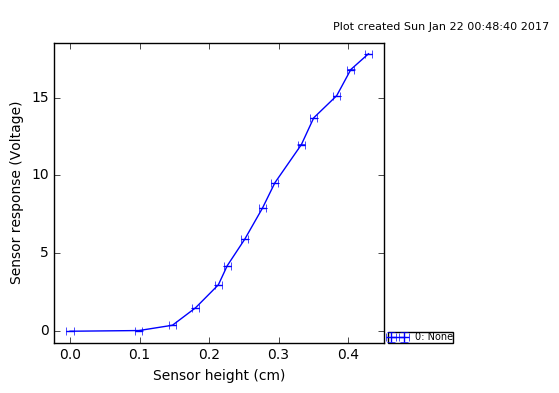

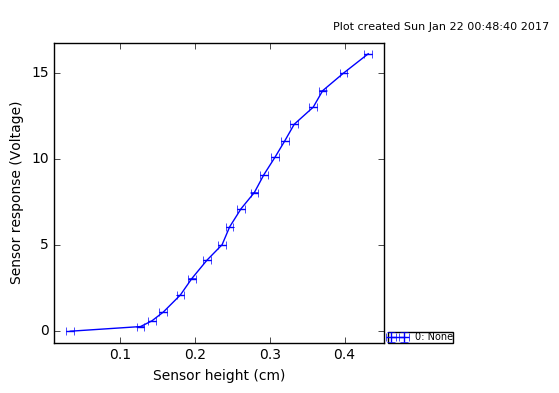

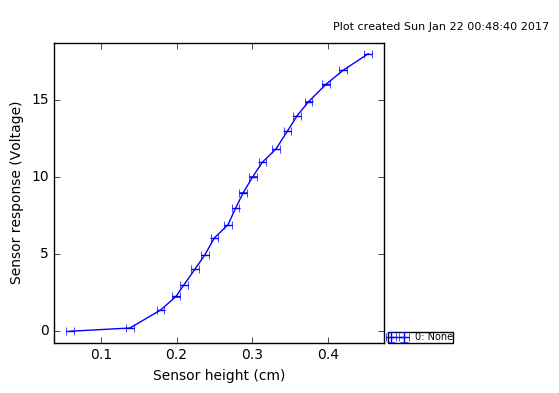

In [15]:
for i, calibration_data in enumerate(calibration_datas):
    fig = s.pylab.figure()
    ax = fig.add_axes([0,0,1,1])
    s.plot.xy.data(
        xdata=calibration_data[0], ydata=calibration_data[1],
        exdata=calibration_data[2], eydata=calibration_data[3],
        xlabel="Sensor height (cm)", ylabel="Sensor response (Voltage)")
    #s.pylab.savefig("calibration_curve"+str(i+1)+".pdf", bbox_inches='tight')

Try to overlap using polynomials:

Try to produce some linear fits:

In [37]:
def obtain_fit_results(calibration_data):
    fit_results = []
    for start in range(0, 11):
        for length in range(3, len(calibration_data[0])-start):
            my_fitter = s.data.fitter(f='a*x + b', p='a, b')
            my_fitter._settings['autoplot'] = False
            length_of_regression = length
            start_of_regression = start
            end_of_regression = start_of_regression + length_of_regression
            my_fitter.set_data(
                xdata=calibration_data[0][start_of_regression:end_of_regression],
                ydata=calibration_data[1][start_of_regression:end_of_regression],
                exdata=calibration_data[2][start_of_regression:end_of_regression],
                eydata=calibration_data[3][start_of_regression:end_of_regression])
            my_fitter.fit()
            chi_squared = my_fitter.reduced_chi_squareds()[0]
            fit_results.append([start, length, chi_squared])
    return fit_results

In [46]:
fit_results = [np.array(obtain_fit_results(calibration_datas[i])) for i in range(3)]
best_fits = [np.argsort(np.abs(fit_results[i][:, 2]-1)) for i in range(3)]

In [53]:
best_fits

[array([51, 45, 39, 40, 21,  0, 46, 42, 41, 47, 48, 38, 53, 52, 57, 56, 60,
        62, 50, 34, 31, 44, 35, 32, 59, 43, 49, 55, 37, 33, 30, 36, 64, 22,
        54, 61, 58, 65, 11, 23, 63, 24, 29,  1, 12, 28, 26, 25, 27, 13, 14,
         2, 15,  3, 16, 20, 17, 19, 18,  4,  5,  6,  7,  8,  9, 10]),
 array([117, 116,  58,  70, 115,  31,  16,  47, 100, 103,  46, 102,  59,
        104, 111, 110, 101, 109,  96,  34,  17,  45,  95,  94,  32,  33,
         87,  86,  91, 108,  85,  93,   0,  84,  48,  60,  62,  63,  76,
         75,  64, 106,  83,  77,  74,  65,  73, 105,  18,  61,  92, 113,
         66,  35,  20,  50,  89,  88,  68,  79, 112,  71,  49,  67,  98,
         78,  97,  19, 119,  51,  72,  82,  52, 118,  56,  53,  37,  36,
         55,  54,  21,  69,  38, 107,  57,  81,  80, 114,   1,  39, 120,
         90,  43,  40,  99,  42,  44,  22,  41,  23,  24,  25,  30,  29,
         26,  28,  27,   2,   3,   4,   5,   6,   7,   8,   9,  10,  15,
         11,  14,  13,  12]),
 array([ 48,  4

In [56]:
for i in range(3):
    print("Curve", i)
    for j in range(10):
        print("Start, length, reduced chi-square:", fit_results[i][best_fits[i][j]])

Curve 0
Start, length, reduced chi-square: [   6.            3.          117.64611872]
Start, length, reduced chi-square: [   5.     3.   121.5]
Start, length, reduced chi-square: [   4.            4.          185.33898305]
Start, length, reduced chi-square: [   4.            5.          225.33697887]
Start, length, reduced chi-square: [   2.      3.    230.64]
Start, length, reduced chi-square: [   0.            3.          294.23518109]
Start, length, reduced chi-square: [   5.            4.          302.48170366]
Start, length, reduced chi-square: [   4.            7.          323.37672157]
Start, length, reduced chi-square: [   4.            6.          345.33029551]
Start, length, reduced chi-square: [   5.            5.          347.99141492]
Curve 1
Start, length, reduced chi-square: [ 10.           5.          20.96135609]
Start, length, reduced chi-square: [ 10.           4.          29.59417808]
Start, length, reduced chi-square: [  4.           3.          47.04054054]
Start